In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow.python.client import device_lib
local_device_protos = device_lib.list_local_devices()
gpuname = [x.name for x in local_device_protos if x.device_type == 'GPU']
tf.device(gpuname)
import keras
import json
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import cv2
import matplotlib.patches as patches
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

Using TensorFlow backend.


### Loading Validation annotations using COCO API

In [7]:
dataDir='data'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [8]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.52s)
creating index...
index created!


## Listing all the categories and supercategories in the dataset

In [9]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
indoor kitchen outdoor vehicle animal sports person appliance furniture accessory food electronic


In [5]:
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [139])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

### Displaying an Image

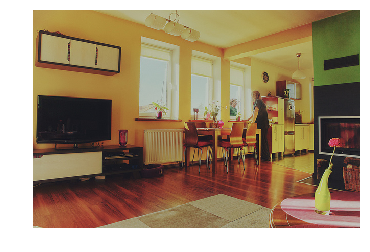

In [6]:
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

### Displaying Image Segments

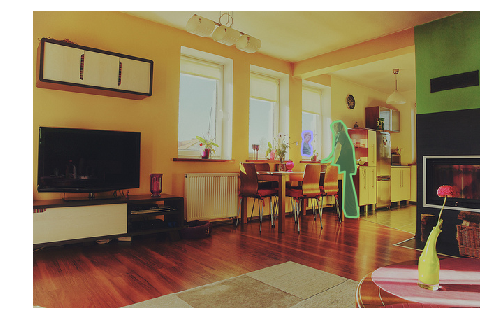

In [41]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [15]:
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.58s)
creating index...
index created!


### Displaying Image Keypoints

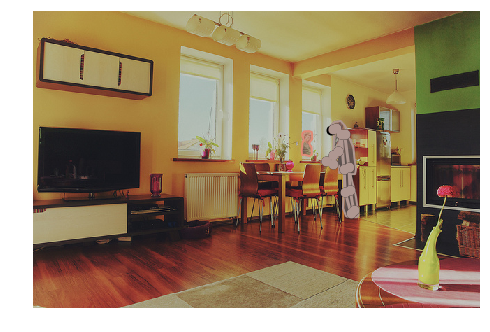

In [16]:
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [17]:
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.17s)
creating index...
index created!


### Displaying Image Captions

A woman stands in the dining area at the table.
A room with chairs, a table, and a woman in it.
A woman standing in a kitchen by a window
A person standing at a table in a room.
A living area with a television and a table


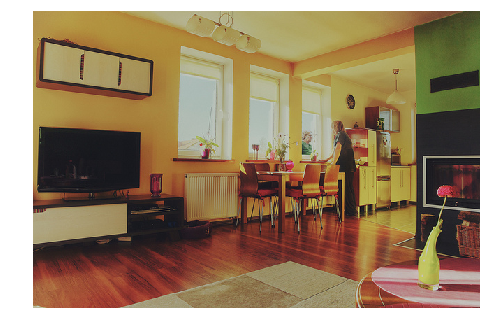

In [18]:
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()

In [7]:
I.shape

(426, 640, 3)

### Displaying Image with Bounding Boxes

In [30]:
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
bag_bbox = [x['bbox'] for x in anns]
category_id = [x['category_id'] for x in anns]

In [31]:
category_id

[1, 1]

In [32]:
bag_bbox

[[412.8, 157.61, 53.05, 138.01], [384.43, 172.21, 15.12, 35.74]]

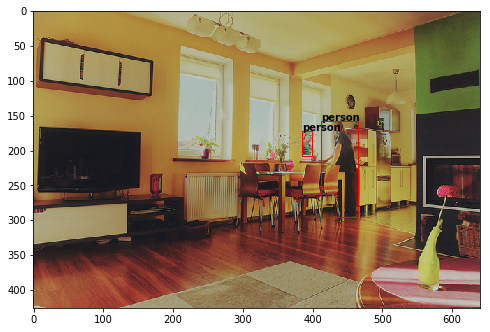

In [51]:
I = io.imread(img['coco_url'])
fig,ax = plt.subplots(1)
i = 0
for bbox in bag_bbox:
    rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    ax.text(bbox[0],bbox[1], coco.cats[category_id[i]]['name'], fontsize=10, fontweight='bold')
    i+=1
plt.imshow(I)
plt.show()